# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [4]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
453798,0.5908,0.3809,1.1255,0.4346,0.0806,0.0391,0.4053,0.5566,0.1465,0.0122,1,1,22,22
287536,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0757,0.0024,0.0537,0,0,0,0
416500,0.1245,0.0024,0.0024,0.0049,0.0024,0.0024,0.0220,0.1685,0.1050,0.0049,0,0,0,0
24409,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0903,0.0024,0.0049,0,0,0,0
106910,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0952,0.0024,0.0024,0,0,0,0


In [4]:
raw_data.shape

(471483, 14)

In [5]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [7]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [8]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

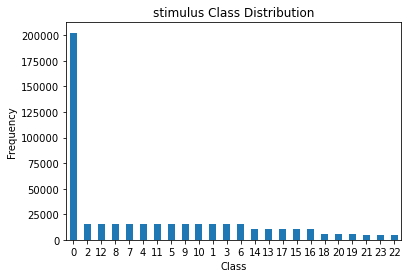

In [9]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [10]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [12]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
416456,0.1685,0.0024,0.0024,0.0122,0.0024,0.0024,0.0073,0.1782,0.1538,0.0220,0,0,0,0
200664,0.0635,0.0024,0.0024,0.0024,0.0024,0.0024,0.1221,0.1636,0.0024,0.1709,9,9,12,12
117010,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.0024,0.0049,0,0,0,0
186687,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0732,0.0024,0.0806,0,0,0,0
120469,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0


In [13]:
raw_data.shape

(378535, 14)

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [15]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [16]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [17]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# AutoEncoder

# Scale data

In [128]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [131]:
n_inputs = X.shape[1]

# AutoEncoder Architecture

In [132]:
# define encoder
visible = Input(shape=(n_inputs,))

### Encoder Layer

In [133]:
e = Dense(786, activation='relu')(visible)
e = Dense(384, activation='relu')(e)
e = Dense(192, activation='relu')(e)


e = BatchNormalization()(e)

### Bottleneck Layer

In [134]:
# bottleneck
n_bottleneck = n_inputs/5
bottleneck = Dense(n_bottleneck)(e)

### Decoder Layer

In [135]:
d = BatchNormalization()(bottleneck)

d = Dense(192, activation='relu')(d)
d = Dense(384, activation='relu')(d)
d = Dense(786, activation='relu')(d)

In [136]:
# output layer
output = Dense(n_inputs, activation='softmax')(d)

In [137]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# Model Compilation 

In [138]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

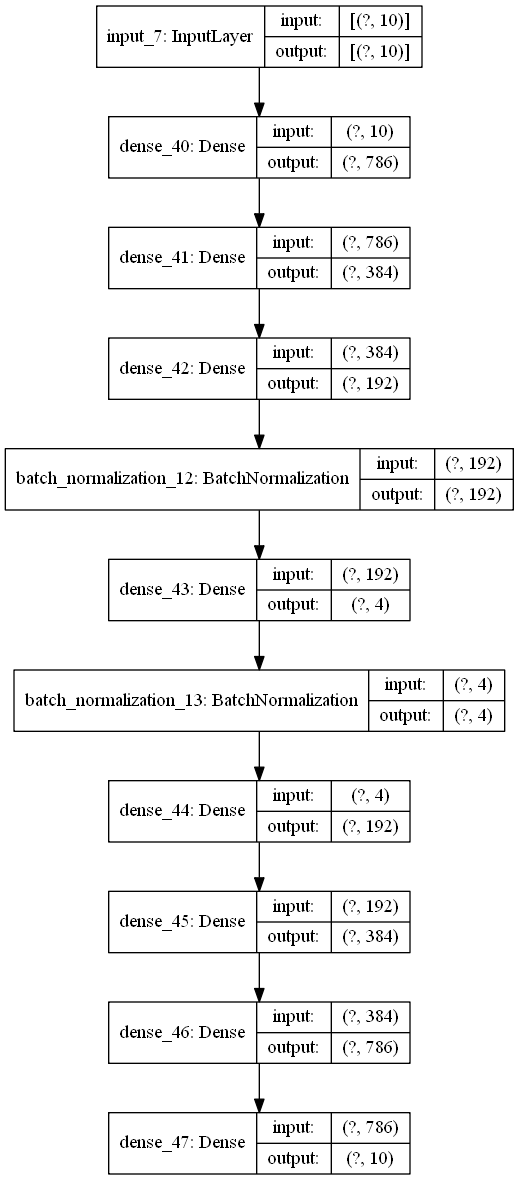

In [139]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [140]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=4056,validation_data=(X_test,X_test))

Epoch 1/50
75/75 [==============================] - 21s 281ms/step - loss: 0.9084 - accuracy: 0.6513 - val_loss: 0.8995 - val_accuracy: 0.7374
Epoch 2/50
75/75 [==============================] - 22s 298ms/step - loss: 0.8826 - accuracy: 0.8666 - val_loss: 0.8968 - val_accuracy: 0.7337
Epoch 3/50
75/75 [==============================] - 24s 320ms/step - loss: 0.8816 - accuracy: 0.8972 - val_loss: 0.8951 - val_accuracy: 0.7386
Epoch 4/50
75/75 [==============================] - 23s 305ms/step - loss: 0.8812 - accuracy: 0.9036 - val_loss: 0.8923 - val_accuracy: 0.7806
Epoch 5/50
75/75 [==============================] - 22s 296ms/step - loss: 0.8810 - accuracy: 0.9098 - val_loss: 0.8904 - val_accuracy: 0.8778
Epoch 6/50
75/75 [==============================] - 24s 324ms/step - loss: 0.8804 - accuracy: 0.9224 - val_loss: 0.8896 - val_accuracy: 0.9144
Epoch 7/50
75/75 [==============================] - 24s 317ms/step - loss: 0.8802 - accuracy: 0.9227 - val_loss: 0.8896 - val_accuracy: 0.8811

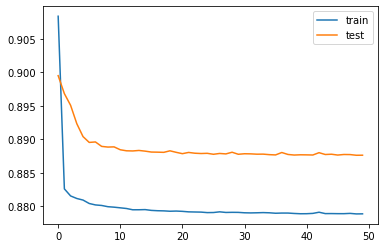

In [141]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [143]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

# Encoder as Data Preparation for Predictive Model

In [144]:
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

# Machine Learning Models

# Decision Tree

In [145]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train_encode, y_train)

DecisionTreeClassifier()

In [146]:
y_pred1 = tree.predict(X_test_encode)

In [147]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 65.0283329150541


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     40005
           1       0.33      0.33      0.33      2108
           2       0.33      0.31      0.32      1923
           3       0.36      0.36      0.36      2110
           4       0.35      0.34      0.34      1957
           5       0.42      0.44      0.43      2046
           6       0.33      0.32      0.32      2187
           7       0.42      0.43      0.43      1753
           8       0.38      0.39      0.38      1740
           9       0.35      0.35      0.35      1876
          10       0.43      0.42      0.42      2030
          11       0.31      0.31      0.31      1940
          12       0.31      0.30      0.31      2123
          13       0.28      0.29      0.29      1332
          14       0.39      0.41      0.40      1226
          15       0.42      0.44      0.43      1161
          16       0.42      0.40      0.41      1543
 

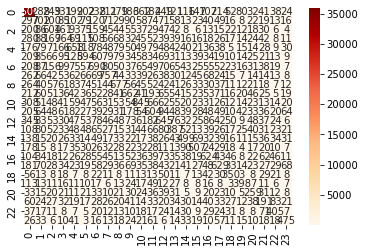

In [148]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [149]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 2.5091999418812
MSE: 27.08019073533491
RMSE: 5.203863058856844


In [150]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.6490416305793888
Recall Score :  0.6502833291505409
f1_score :  0.6495957118046035


# KNeighborsClassifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train_encode, y_train)

KNeighborsClassifier()

In [152]:
y_pred2 = KNeighborsClassifier.predict(X_test_encode)

In [153]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 71.42668445454186


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     40005
           1       0.40      0.44      0.42      2108
           2       0.42      0.40      0.41      1923
           3       0.46      0.43      0.44      2110
           4       0.46      0.42      0.44      1957
           5       0.51      0.50      0.51      2046
           6       0.45      0.37      0.40      2187
           7       0.56      0.50      0.53      1753
           8       0.51      0.43      0.47      1740
           9       0.44      0.46      0.45      1876
          10       0.60      0.46      0.52      2030
          11       0.43      0.35      0.38      1940
          12       0.45      0.34      0.39      2123
          13       0.43      0.32      0.36      1332
          14       0.50      0.53      0.51      1226
          15       0.58      0.51      0.54      1161
          16       0.51      0.47      0.49      1543
 

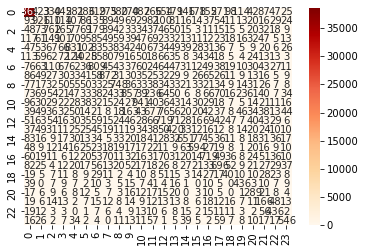

In [154]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

In [5]:
raw_data.head()

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0,0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0,0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0,0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0,0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0,0,0
